In [ ]:
#site de simulation d'un RNN:http://www.cs.cmu.edu/~aharley/vis/conv/flat.html
import tensorflow as tf
#importer le modèle séquentiel
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
#importer une base de donnée préinstallé sur kiras
from tensorflow.keras.datasets import cifar10
#importer le package qui permet de géer les images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#importer les pachages responsables sur les couches
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

**Préparation des données**

In [ ]:
#chargement de la base de données
#integrer directement la bd dans la parti test et la parti train
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

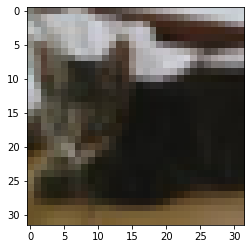

In [ ]:
#découvrir la bd
plt.imshow(x_train[9])

In [ ]:
x_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

on remaruqe que les chiffres ne sont pas entre 0 et 1 donc on a besoin de normaliser les photos

In [ ]:
#Normaliser les photos en divisant sur la valeur maximale pour avoir des valeurs entre 0 et 1
x_train=x_train/255.0
x_test=x_test/225.0

In [ ]:
x_train[3]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

on ramarque que tout est entre 0 et 1

In [ ]:
#Créer mon modèle
model=Sequential()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

NB:50000 est le nbr d'images dans la base de donnée/
(32,32) est la taille de l'image/
3 est pr le code RGB (code couleur)

In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
#Creer le réseau de convolution (CNN)
#on commence par la creation de la couche de convolution(ou on indique le nbr de filtre qui est 256,et la taille du filtre qui est (3,3)(changeable))
#on est dans la 1er couche donc on doit distinguer la taille de l'entrée(taille de la photo)
model.add(Conv2D(256,(3,3),input_shape=x_train.shape[1:]))
#NB: on a mis le 1 pour ne pas prendre la taille de toute la base de donnée(on prend juste la taille du photo qui est 32*32*3)
model.add(Activation('relu'))

In [ ]:
#NB:dans le maxPoolng on spécifie la taille du pool(i-e la taille du careau qu'on spécifie et ou on choisi la taille maximale)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#on peut ameliorer la précision on ajoutant une autre couche de convolution
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())#ICI on est pas trop interessé à la taille donc on laisse ça ouvert

In [ ]:
model.add(Dense(64))#noeuds d'entrés
model.add(Dense(10))#couche de sortie contient 10 noeuds car on a 10 categories de photo(voir le site de photo)
model.add(Activation('sigmoid'))#on a choisi la fct d'activation sigmoid car on a des 0 et des 1
model.compile(loss="sparse_cat") 
#dans le cas ou on a plusieurs catégories on utilise la fct de perte suivante :sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics='sparse_categorical_accuracy')#optimizer pour gérer les poids dans notre réseau

In [ ]:
#faire une systhèse de mon réseau
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 activation_2 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 activation_3 (Activation)   (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                  

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 735s 470ms/step - loss: 1.3865 - sparse_categorical_accuracy: 0.5061
Epoch 2/10
1563/1563 [==============================] - 723s 463ms/step - loss: 1.0695 - sparse_categorical_accuracy: 0.6285
Epoch 3/10
1563/1563 [==============================] - 725s 464ms/step - loss: 0.9632 - sparse_categorical_accuracy: 0.6663
Epoch 4/10
1563/1563 [==============================] - 723s 462ms/step - loss: 0.8910 - sparse_categorical_accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 722s 462ms/step - loss: 0.8451 - sparse_categorical_accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 718s 460ms/step - loss: 0.8054 - sparse_categorical_accuracy: 0.7205
Epoch 7/10
1563/1563 [==============================] - 713s 456ms/step - loss: 0.7673 - sparse_categorical_accuracy: 0.7321
Epoch 8/10
1563/1563 [==============================] - 714s 457ms/step - loss: 0.7384 - sparse_categorical_accuracy: 0.7434


In [ ]:
#voir la précision de notre réseau de neurone
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 36s 115ms/step - loss: 0.9238 - sparse_categorical_accuracy: 0.6950
